Regresi Sederhana


In [ ]:

import pandas as pd

#Membuat data frame untuk membaca data
df = pd.read_csv('../data/socr.csv', sep=',')
df.head() # mengambil 5 baris data dari atas

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [3]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


Praproses Data

In [8]:
# konversi data menjadi satuan cm dan kg
df1 = (df [["Height(Inches)", "Weight(Pounds)"]]
       .rename(columns={"Height(Inches)":"tinggi_cm", 
                        "Weight(Pounds)": "berat_kg"}).copy())

# konversi satuan
df1["tinggi_cm"] = df1["tinggi_cm"] * 2.54
df1["berat_kg"] = df1["berat_kg"] * 0.453592

df1.head()

,tinggi_cm,berat_kg
0,167.089607,51.252494
1,181.648633,61.909547
2,176.272800,69.411778
3,173.270164,64.562199
4,172.181037,65.452010


Split Data Training 80% dan Data Testing 20%

In [17]:
from sklearn.model_selection import train_test_split

x = df1[["tinggi_cm"]]
y = df1[["berat_kg"]]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=7
)

x_train.head()


,tinggi_cm
3253,167.141017
18789,178.494969
4466,169.746473
19269,181.971290
6527,177.597029


Permodelan Data: dengan data training

In [ ]:
from sklearn.linear_model import LinearRegression
#Buat object model instan dari class Linear Regression
model = LinearRegression()
#Lakukan proses training
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Evaluasi Model

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prediksi
y_pred = model.predict(x_test)

# Evaluasi model
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):", model.intercept_)
print("R2 (test):", r2)
print("MAE (kg):", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)  # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):", rmse)


Koefisien (kg per cm): [0.55183196]
Intersep (kg): [-37.65866767]
R2 (test): 0.24990101486945016
MAE (kg): 3.6704537992278348
RMSE (kg): 4.609031117453372


Persamaan Regresi

In [24]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")


Persamaan: y = 0.552 * x + -37.659


Plot Regresi

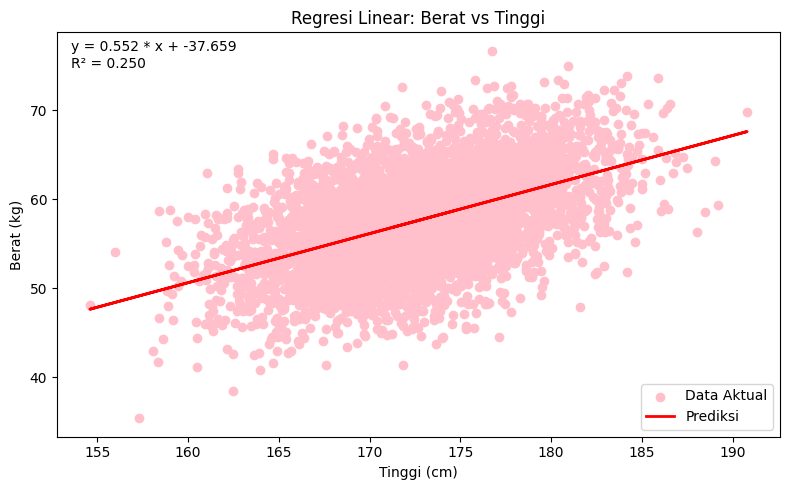

In [26]:
import matplotlib.pyplot as plt

# Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color="pink", label="Data Aktual")

# Garis regresi
plt.plot(x_test, y_pred, color="red", linewidth=2, label="Prediksi")

plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")

# Tampilkan persamaan & R² di dalam grafik
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\nR² = {r2:.3f}",
    transform=plt.gca().transAxes,
    va="top"
)

plt.legend()
plt.tight_layout()
plt.show()


Data Testing

In [27]:
import pandas as pd

#Membuat data frame untuk membaca data
df = pd.read_csv('../data/berat_ti2022.csv', sep=',')
df.head() # mengambil 5 baris data dari atas

,no,nama,tinggi_cm,actual_berat
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Keyla,160,70.3
4,5,Bani,183,65.8


In [28]:
df.describe()

,no,tinggi_cm,actual_berat
count,5.000000,5.000000,5.000000
mean,3.000000,165.600000,65.100000
std,1.581139,10.784248,9.955652
min,1.000000,155.000000,52.700000
25%,2.000000,160.000000,58.500000
50%,3.000000,162.000000,65.800000
75%,4.000000,168.000000,70.300000
max,5.000000,183.000000,78.200000


ambil x_testing

In [36]:
x = df["tinggi_cm"]
x

0    168
1    162
2    155
3    160
4    183
Name: tinggi_cm, dtype: int64

In [39]:
y_pred = model.predict(df[['tinggi_cm']])
df['prediksi_kg'] = y_pred
df["Selisih error (kg)"] = df["prediksi_kg"] - df["actual_berat"]
denom = df["actual_berat"].replace(0, np.nan)
df["Akurasi (%)"] = (1 - (df["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
df

,no,nama,tinggi_cm,actual_berat,prediksi_kg,Selisih error (kg),Akurasi (%)
0,1,Rafa,168,58.5,55.049101,-3.450899,94.101028
1,2,Tiara,162,78.2,51.738109,-26.461891,66.161265
2,3,Tia,155,52.7,47.875286,-4.824714,90.844944
3,4,Keyla,160,70.3,50.634445,-19.665555,72.026238
4,5,Bani,183,65.8,63.326580,-2.473420,96.241004


Multiple Linear Regresi


Membaca data file CSV

In [2]:
import pandas as pd

#Membuat data frame untuk membaca data
df = pd.read_csv('../data/stunting.csv', sep=',')
df.head() # mengambil 5 baris data dari atas

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


Menghitung statistik deskriptif pada kolom numeric dengan describe.

In [3]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


Data Pre-processing

In [4]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin": "jk", "Umur (bulan)": "umur_bln",
                        "Tinggi Badan (cm)": "tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())

## Laki-Laki: 1, Perempuan : 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()


,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


Analisis Korelasi

In [5]:
# Hitung matriks korelasi
corr_matrix = df1.corr()

print(corr_matrix)


           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


Buat Heatmap Grafik

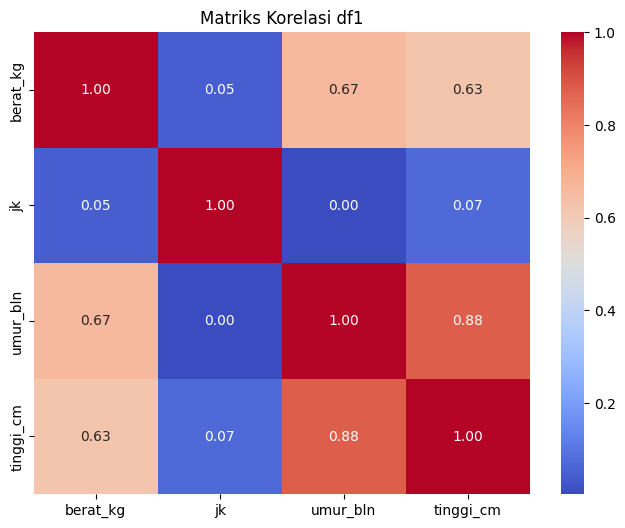

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()


Membagi dataset untuk Training dan Test

In [7]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, # Variabel dependen
y = df1["berat_kg"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["umur_bln", "tinggi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state supaya hasil konsisten
)

## Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

## cek apakah sudah ada constanta pada data training
X_train.head()


Jumlah data train : 80000
Jumlah data test  : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


Pemodelan

In [11]:
import statsmodels.api as sm

# lalu:
X_train_const = sm.add_constant(X_train)
X_train_const.head()


,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [12]:
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-------------------------------')
print(model.params)
print('-------------------------------')

const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

#print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")


-------------------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
-------------------------------
y = 2.546 + 0.230*x1 + 0.054*x2


Cetak informasi model regresi OLS

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Sun, 12 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:48:25   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

Pengujian model dengan data testing

In [15]:
import numpy as np  # ← tambahkan ini di awal

# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 × (1 − |error/aktual|)), dibatasi 0–100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil


,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845
